<a href="https://colab.research.google.com/github/Achapiyu/Sentiment-Analysis-NLP-with-Python/blob/main/Hands_On_AI_Master_Training_Advance_Image_Generation_using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advance Training AI Center for Learning and Optimization**

### **Image Generation using Generative Adversarial Network (GAN)**
<br/>

Dibuat dan dipaparkan oleh:

<img src="https://ailo.telkomuniversity.ac.id/wp-content/uploads/2023/07/cropped-logo-stempel-ai-center-1-219x60.png" width="200px"/>

© 2023 AI Center for Learning and Optimization

[Instagram](https://www.instagram.com/aicenter.telu/) | [Website](https://ailo.telkomuniversity.ac.id/) | [LinkedIn](https://www.linkedin.com/in/ai-center-62111928a/)
<br/>
<br/>

# **Load Dataset**

Dataset yang digunakan yaitu dataset dari keras yang bernama **`CIFAR-10`** dataset

Dataset **`CIFAR-10`** dibagi menjadi train dan test dengan total **`50000`** gambar untuk train dan **`10000`** gambar untuk test

In [1]:
# example of loading the cifar10 dataset
from keras.datasets.cifar10 import load_data

# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

170498071/170498071 [==============================] - 6s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


# **See Images for Train**

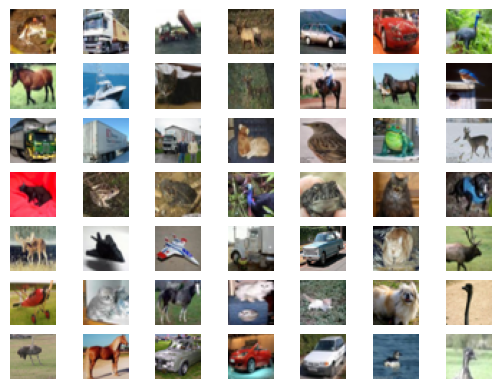

In [2]:
# example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

# plot images from the training dataset
for i in range(49):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i])

pyplot.show()

# **Discriminator Model**

## Create The Discriminator Model

Tahap pertama adalah membuat discriminator model.

Model yang dibuat harus mengambil sampel gambar dari kumpulan data yang sudah disiapkan sebagai input dan output prediksi klasifikasi apakah sampel tersebut asli atau palsu.

**`Input`** : Gambar dengan 3 channel warna (RGB) dan berukuran 32x32 piksel

**`Output`** : Klasifikasi biner, kemungkinan sampel gambar asli atau palsu

In [3]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [4]:
from keras.engine import sequential
# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))

	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same')) # ---> Isi Bagian ini
	model.add(LeakyReLU(alpha=0.2))

	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same')) # ---> Isi Bagian ini
	model.add(LeakyReLU(alpha=0.2))

	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same')) # ---> Isi Bagian ini
	model.add(LeakyReLU(alpha=0.2))

	# classifier
	model.add(Conv2D()) # ---> Isi Bagian ini
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))

	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [5]:
from keras.utils.vis_utils import plot_model

# create the discriminator
d_model = define_discriminator() # ---> Isi bagian ini

# summarize the model
d_model.summary()

# plot the model
plot_model(d_model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

TypeError: ignored

## Load and Prepare dataset of Real Images

Pertama, gunakan fungsi **`cifar.load_data()`** untuk load dataset CIFAR-10 dan gunakan bagian input dari dataset training sebagai real images.

Kemudian menskalakan nilai piksel dari [0,255] menjadi [-1,1]

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [ ]:
# load and prepare cifar10 training images
def load_real_samples():
 # load cifar10 dataset
 (..., _), (_, _) = load_data() # --> Isi Bagian ini

 # convert from unsigned ints to floats
 X = trainX.astype('float32')

 # scale from [0,255] to [-1,1]
 X = (X - 127.5) / 127.5
 return X

Fungsi **`generate_reaL_samples()`** dibawah ini akan menggunakan dataset training sebagai argumen dan akan memilih subsampel gambar secara acak. Itu juga akan mengembalikan label kelas untuk sampel, khususnya `class label 1` untuk mengindikasikan `real images`

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
 # choose random instances
 ix = randint(0, dataset.shape[0], n_samples)

 # retrieve selected images
 X = dataset[ix]

 # generate 'real' class labels (1)
 y = ones((n_samples, 1))
 return X, y

# **Generator Model**

## Create the Generator Model

Generator model bertanggung jawab untuk membuat `fake images` yang baru tetapi masuk akal.

**`Inputs`**: Point in latent space, e.g. a 100-element vector of Gaussian random numbers.

**`Outputs`**: Citra dua dimensi dengan 3 channel warna (RGB) ukuran 32x32 piksel dengan nilai piksel [-1,1]

Mengembangkan model generator mengharuskan kita mengubah vektor dari ruang laten dengan dimensi sebesar 100 menjadi array 2D dengan nilai 32 x 32 x 3

In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
  model = ...() # ---> Isi bagian ini
  # foundation for 4x4 image
  n_nodes = 256 * 4 * 4
  model.add(...(n_nodes, input_dim=latent_dim)) # ---> Isi bagian ini
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))

  # upsample to 8x8
  model.add(...(128, (4,4), strides=(2,2), padding='same')) # ---> Isi bagian ini
  model.add(LeakyReLU(alpha=0.2))

  # upsample to 16x16
  model.add(...(128, (4,4), strides=(2,2), padding='same')) # ---> Isi bagian ini
  model.add(LeakyReLU(alpha=0.2))

  # upsample to 32x32
  model.add(...(128, (4,4), strides=(2,2), padding='same')) # ---> Isi bagian ini
  model.add(LeakyReLU(alpha=0.2))

  # output layer
  model.add(...(3, (3,3), activation='tanh', padding='same')) # ---> Isi bagian ini
  return model

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

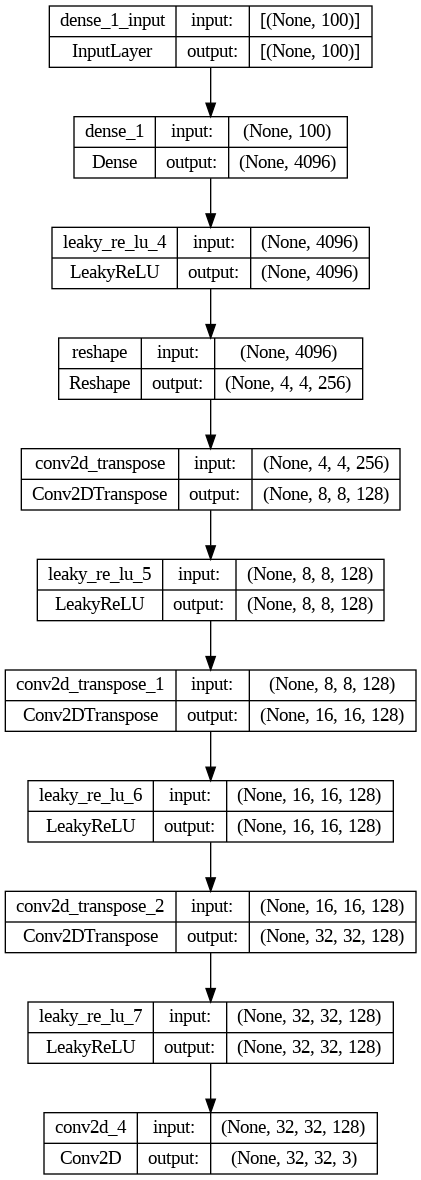

In [ ]:
# define the size of the latent space
latent_dim = 100

# create the generator
g_model = ...(latent_dim) # ---> Isi bagian ini

# summarize the model
g_model.summary()

# plot the model
plot_model(g_model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

## Create Fake Images

Langkah pertama adalah menghasilkan titik baru di ruang laten. Kita dapat mencapainya dengan memanggil fungsi `randn()` NumPy untuk menghasilkan array bilangan acak yang diambil dari Gaussian standar.

Susunan bilangan acak tersebut kemudian dapat dibentuk kembali menjadi sampel, yaitu n baris dengan 100 elemen per baris. Fungsi **`generate_latent_points()`** di bawah mengimplementasikan ini dan menghasilkan jumlah titik yang diinginkan di ruang laten yang dapat digunakan sebagai input ke model generator.

In [ ]:
def generate_latent_points(latent_dim, n_samples):
 # generate points in the latent space
 x_input = randn(latent_dim * n_samples)

 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input

Selanjutnya, kita dapat menggunakan titik yang dihasilkan sebagai input ke model generator untuk menghasilkan sampel baru, lalu memplot sampel tersebut.

Kita dapat memperbarui fungsi **`generate_fake_samples()`** dari bagian sebelumnya untuk menggunakan model generator sebagai argumen dan menggunakannya untuk menghasilkan jumlah sampel yang diinginkan dengan terlebih dahulu memanggil fungsi **`generate_latent_points()`** untuk menghasilkan jumlah titik yang diperlukan dalam ruang laten sebagai input ke model.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
 # generate points in latent space
 x_input = generate_latent_points(latent_dim, n_samples)

 # predict outputs
 X = g_model.predict(x_input)

 # create 'fake' class labels (0)
 y = zeros((n_samples, 1))
 return X, y

# **Combine Generator Model and Discriminator Model**

Fungsi **`define_gan()`** menggabungkan antara discriminator model dan generator model. Bobot yang berada dalam disriminator model ditandai sebagai `Trainable = False`.

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False

	# connect them
	model = ...() # ---> Isi bagian ini

	# add generator
	model.add(...) # ---> Isi bagian ini

	# add the discriminator
	model.add(...) # ---> Isi bagian ini

	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_2 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


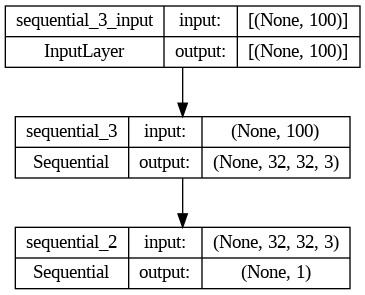

In [ ]:
# size of the latent space
latent_dim = 100

# create the discriminator
d_model = define_discriminator()

# create the generator
g_model = define_generator(latent_dim)

# create the gan
gan_model = define_gan(..., ...) # ---> Isi bagian ini

# summarize gan model
gan_model.summary()

# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

## Train and Evaluate Combine Model

Bagian ini untuk menyimpan hasil plot dari model dalam mengenerate images

In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0

	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])

	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

Pada fungsi **`summarize_performance()`** berfungsi untuk menyimpan model dan membuat serta menyimpan contoh yang dihasilkan plot.

Model generator dapat disimpan dengan memanggil fungsi save() pada model generator dan memberikan nama file yang unik berdasarkan nomor masa pelatihan.

### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = ...(dataset, n_samples) # ---> Isi bagian ini

	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

	# prepare fake examples
	x_fake, y_fake = ...(g_model, latent_dim, n_samples) # ---> Isi bagian ini

	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

	# save plot
	save_plot(x_fake, epoch)

	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

Dalam fungsi **`train()`**, bobot yang berada dalam model generator akan terupdate setiap epoch tidak seperti bobot dari model discriminator yang masih default seperti yang sudah disebutkan sebelumnya pada fungsi **`define_gan()`**.

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=300, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)

	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)

			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)

			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)

			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)

			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))

			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)

			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 20 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

Pada fungsi **`save_plot()`** berfungsi untuk membuat dan menyimpan hasil plot dari model GAN



### **NOTE !!!**

**Ada Bagian yang kosong, silahkan diisi sesuai dengan yang sudah diajarkan sebelumnya**

In [ ]:
# size of the latent space
latent_dim = 100

# create the discriminator
d_model = define_discriminator()

# create the generator
g_model = define_generator(latent_dim)

# create the gan
gan_model = define_gan(..., ...) # ---> Isi bagian ini

# load image data
dataset = load_real_samples()

# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>14, 232/390, d1=0.698, d2=0.653 g=0.814
2/2 [==============================] - 0s 3ms/step
>14, 233/390, d1=0.639, d2=0.647 g=0.808
2/2 [==============================] - 0s 3ms/step
>14, 234/390, d1=0.700, d2=0.652 g=0.879
2/2 [==============================] - 0s 3ms/step
>14, 235/390, d1=0.715, d2=0.677 g=0.804
2/2 [==============================] - 0s 3ms/step
>14, 236/390, d1=0.707, d2=0.706 g=0.812
2/2 [==============================] - 0s 3ms/step
>14, 237/390, d1=0.665, d2=0.639 g=0.779
2/2 [==============================] - 0s 3ms/step
>14, 238/390, d1=0.690, d2=0.660 g=0.822
2/2 [==============================] - 0s 3ms/step
>14, 239/390, d1=0.689, d2=0.681 g=0.767
2/2 [==============================] - 0s 5ms/step
>14, 240/390, d1=0.654, d2=0.696 g=0.845
2/2 [==============================] - 0s 3ms/step
>14, 241/390, d1=0.678, d2=0.690 g=0.875
2/2 [========================

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>34, 232/390, d1=0.657, d2=0.626 g=0.911
2/2 [==============================] - 0s 3ms/step
>34, 233/390, d1=0.772, d2=0.650 g=0.861
2/2 [==============================] - 0s 3ms/step
>34, 234/390, d1=0.736, d2=0.657 g=0.850
2/2 [==============================] - 0s 3ms/step
>34, 235/390, d1=0.680, d2=0.621 g=0.865
2/2 [==============================] - 0s 3ms/step
>34, 236/390, d1=0.709, d2=0.670 g=0.835
2/2 [==============================] - 0s 3ms/step
>34, 237/390, d1=0.688, d2=0.692 g=0.813
2/2 [==============================] - 0s 3ms/step
>34, 238/390, d1=0.694, d2=0.611 g=0.828
2/2 [==============================] - 0s 3ms/step
>34, 239/390, d1=0.668, d2=0.674 g=0.818
2/2 [==============================] - 0s 3ms/step
>34, 240/390, d1=0.738, d2=0.622 g=0.825
2/2 [==============================] - 0s 3ms/step
>34, 241/390, d1=0.695, d2=0.630 g=0.803
2/2 [========================

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>54, 232/390, d1=0.603, d2=0.645 g=0.861
2/2 [==============================] - 0s 3ms/step
>54, 233/390, d1=0.637, d2=0.644 g=0.879
2/2 [==============================] - 0s 3ms/step
>54, 234/390, d1=0.647, d2=0.623 g=0.901
2/2 [==============================] - 0s 3ms/step
>54, 235/390, d1=0.595, d2=0.639 g=0.923
2/2 [==============================] - 0s 3ms/step
>54, 236/390, d1=0.736, d2=0.616 g=0.947
2/2 [==============================] - 0s 3ms/step
>54, 237/390, d1=0.650, d2=0.568 g=0.863
2/2 [==============================] - 0s 3ms/step
>54, 238/390, d1=0.630, d2=0.634 g=0.898
2/2 [==============================] - 0s 3ms/step
>54, 239/390, d1=0.721, d2=0.588 g=0.914
2/2 [==============================] - 0s 3ms/step
>54, 240/390, d1=0.686, d2=0.628 g=0.830
2/2 [==============================] - 0s 3ms/step
>54, 241/390, d1=0.698, d2=0.666 g=0.827
2/2 [========================

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>74, 232/390, d1=0.622, d2=0.656 g=0.860
2/2 [==============================] - 0s 3ms/step
>74, 233/390, d1=0.565, d2=0.624 g=0.884
2/2 [==============================] - 0s 3ms/step
>74, 234/390, d1=0.645, d2=0.621 g=0.952
2/2 [==============================] - 0s 4ms/step
>74, 235/390, d1=0.577, d2=0.623 g=0.925
2/2 [==============================] - 0s 3ms/step
>74, 236/390, d1=0.642, d2=0.694 g=0.883
2/2 [==============================] - 0s 3ms/step
>74, 237/390, d1=0.705, d2=0.642 g=0.856
2/2 [==============================] - 0s 3ms/step
>74, 238/390, d1=0.658, d2=0.689 g=0.910
2/2 [==============================] - 0s 3ms/step
>74, 239/390, d1=0.556, d2=0.644 g=0.910
2/2 [==============================] - 0s 3ms/step
>74, 240/390, d1=0.661, d2=0.636 g=0.932
2/2 [==============================] - 0s 3ms/step
>74, 241/390, d1=0.660, d2=0.622 g=0.981
2/2 [========================

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>94, 232/390, d1=0.600, d2=0.581 g=0.988
2/2 [==============================] - 0s 3ms/step
>94, 233/390, d1=0.651, d2=0.599 g=0.942
2/2 [==============================] - 0s 3ms/step
>94, 234/390, d1=0.513, d2=0.673 g=0.969
2/2 [==============================] - 0s 3ms/step
>94, 235/390, d1=0.698, d2=0.605 g=0.955
2/2 [==============================] - 0s 3ms/step
>94, 236/390, d1=0.613, d2=0.613 g=0.970
2/2 [==============================] - 0s 3ms/step
>94, 237/390, d1=0.626, d2=0.696 g=1.014
2/2 [==============================] - 0s 4ms/step
>94, 238/390, d1=0.601, d2=0.653 g=1.007
2/2 [==============================] - 0s 3ms/step
>94, 239/390, d1=0.695, d2=0.620 g=0.972
2/2 [==============================] - 0s 3ms/step
>94, 240/390, d1=0.726, d2=0.578 g=0.993
2/2 [==============================] - 0s 3ms/step
>94, 241/390, d1=0.575, d2=0.605 g=1.008
2/2 [========================

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>114, 232/390, d1=0.585, d2=0.560 g=1.060
2/2 [==============================] - 0s 3ms/step
>114, 233/390, d1=0.544, d2=0.563 g=0.966
2/2 [==============================] - 0s 3ms/step
>114, 234/390, d1=0.586, d2=0.678 g=1.059
2/2 [==============================] - 0s 3ms/step
>114, 235/390, d1=0.561, d2=0.538 g=1.118
2/2 [==============================] - 0s 3ms/step
>114, 236/390, d1=0.621, d2=0.633 g=1.110
2/2 [==============================] - 0s 3ms/step
>114, 237/390, d1=0.567, d2=0.597 g=1.105
2/2 [==============================] - 0s 3ms/step
>114, 238/390, d1=0.626, d2=0.527 g=1.192
2/2 [==============================] - 0s 4ms/step
>114, 239/390, d1=0.588, d2=0.548 g=1.049
2/2 [==============================] - 0s 3ms/step
>114, 240/390, d1=0.634, d2=0.578 g=1.049
2/2 [==============================] - 0s 3ms/step
>114, 241/390, d1=0.642, d2=0.718 g=1.108
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>134, 232/390, d1=0.596, d2=0.524 g=1.165
2/2 [==============================] - 0s 3ms/step
>134, 233/390, d1=0.595, d2=0.525 g=1.167
2/2 [==============================] - 0s 3ms/step
>134, 234/390, d1=0.630, d2=0.576 g=1.145
2/2 [==============================] - 0s 3ms/step
>134, 235/390, d1=0.573, d2=0.529 g=1.119
2/2 [==============================] - 0s 3ms/step
>134, 236/390, d1=0.605, d2=0.587 g=1.124
2/2 [==============================] - 0s 3ms/step
>134, 237/390, d1=0.538, d2=0.463 g=1.164
2/2 [==============================] - 0s 3ms/step
>134, 238/390, d1=0.533, d2=0.532 g=1.185
2/2 [==============================] - 0s 3ms/step
>134, 239/390, d1=0.621, d2=0.507 g=1.155
2/2 [==============================] - 0s 3ms/step
>134, 240/390, d1=0.629, d2=0.615 g=1.196
2/2 [==============================] - 0s 3ms/step
>134, 241/390, d1=0.445, d2=0.630 g=1.224
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>154, 232/390, d1=0.621, d2=0.596 g=1.296
2/2 [==============================] - 0s 3ms/step
>154, 233/390, d1=0.594, d2=0.454 g=1.311
2/2 [==============================] - 0s 3ms/step
>154, 234/390, d1=0.690, d2=0.512 g=1.208
2/2 [==============================] - 0s 3ms/step
>154, 235/390, d1=0.545, d2=0.573 g=1.301
2/2 [==============================] - 0s 3ms/step
>154, 236/390, d1=0.590, d2=0.536 g=1.256
2/2 [==============================] - 0s 3ms/step
>154, 237/390, d1=0.447, d2=0.548 g=1.213
2/2 [==============================] - 0s 3ms/step
>154, 238/390, d1=0.574, d2=0.478 g=1.229
2/2 [==============================] - 0s 3ms/step
>154, 239/390, d1=0.600, d2=0.563 g=1.261
2/2 [==============================] - 0s 3ms/step
>154, 240/390, d1=0.629, d2=0.569 g=1.280
2/2 [==============================] - 0s 3ms/step
>154, 241/390, d1=0.643, d2=0.432 g=1.272
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>174, 232/390, d1=0.643, d2=0.579 g=1.358
2/2 [==============================] - 0s 3ms/step
>174, 233/390, d1=0.608, d2=0.545 g=1.289
2/2 [==============================] - 0s 3ms/step
>174, 234/390, d1=0.479, d2=0.466 g=1.268
2/2 [==============================] - 0s 3ms/step
>174, 235/390, d1=0.648, d2=0.554 g=1.259
2/2 [==============================] - 0s 3ms/step
>174, 236/390, d1=0.466, d2=0.506 g=1.355
2/2 [==============================] - 0s 3ms/step
>174, 237/390, d1=0.666, d2=0.452 g=1.229
2/2 [==============================] - 0s 3ms/step
>174, 238/390, d1=0.506, d2=0.511 g=1.478
2/2 [==============================] - 0s 3ms/step
>174, 239/390, d1=0.560, d2=0.548 g=1.406
2/2 [==============================] - 0s 3ms/step
>174, 240/390, d1=0.705, d2=0.474 g=1.254
2/2 [==============================] - 0s 3ms/step
>174, 241/390, d1=0.620, d2=0.546 g=1.337
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>194, 232/390, d1=0.528, d2=0.415 g=1.460
2/2 [==============================] - 0s 3ms/step
>194, 233/390, d1=0.491, d2=0.459 g=1.435
2/2 [==============================] - 0s 3ms/step
>194, 234/390, d1=0.405, d2=0.506 g=1.531
2/2 [==============================] - 0s 3ms/step
>194, 235/390, d1=0.485, d2=0.539 g=1.452
2/2 [==============================] - 0s 3ms/step
>194, 236/390, d1=0.590, d2=0.370 g=1.364
2/2 [==============================] - 0s 3ms/step
>194, 237/390, d1=0.448, d2=0.551 g=1.441
2/2 [==============================] - 0s 3ms/step
>194, 238/390, d1=0.590, d2=0.431 g=1.584
2/2 [==============================] - 0s 3ms/step
>194, 239/390, d1=0.651, d2=0.544 g=1.362
2/2 [==============================] - 0s 3ms/step
>194, 240/390, d1=0.461, d2=0.505 g=1.552
2/2 [==============================] - 0s 3ms/step
>194, 241/390, d1=0.686, d2=0.551 g=1.429
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>214, 232/390, d1=0.397, d2=0.576 g=1.574
2/2 [==============================] - 0s 3ms/step
>214, 233/390, d1=0.543, d2=0.515 g=1.553
2/2 [==============================] - 0s 3ms/step
>214, 234/390, d1=0.477, d2=0.376 g=1.573
2/2 [==============================] - 0s 3ms/step
>214, 235/390, d1=0.546, d2=0.473 g=1.463
2/2 [==============================] - 0s 3ms/step
>214, 236/390, d1=0.503, d2=0.501 g=1.533
2/2 [==============================] - 0s 3ms/step
>214, 237/390, d1=0.461, d2=0.404 g=1.483
2/2 [==============================] - 0s 3ms/step
>214, 238/390, d1=0.587, d2=0.472 g=1.609
2/2 [==============================] - 0s 3ms/step
>214, 239/390, d1=0.488, d2=0.545 g=1.529
2/2 [==============================] - 0s 3ms/step
>214, 240/390, d1=0.490, d2=0.415 g=1.675
2/2 [==============================] - 0s 3ms/step
>214, 241/390, d1=0.503, d2=0.461 g=1.596
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>234, 232/390, d1=0.474, d2=0.509 g=1.680
2/2 [==============================] - 0s 3ms/step
>234, 233/390, d1=0.535, d2=0.397 g=1.673
2/2 [==============================] - 0s 3ms/step
>234, 234/390, d1=0.506, d2=0.373 g=1.686
2/2 [==============================] - 0s 3ms/step
>234, 235/390, d1=0.415, d2=0.351 g=1.831
2/2 [==============================] - 0s 3ms/step
>234, 236/390, d1=0.292, d2=0.465 g=1.769
2/2 [==============================] - 0s 3ms/step
>234, 237/390, d1=0.444, d2=0.432 g=1.817
2/2 [==============================] - 0s 3ms/step
>234, 238/390, d1=0.643, d2=0.393 g=1.687
2/2 [==============================] - 0s 3ms/step
>234, 239/390, d1=0.553, d2=0.492 g=1.726
2/2 [==============================] - 0s 3ms/step
>234, 240/390, d1=0.413, d2=0.335 g=1.732
2/2 [==============================] - 0s 3ms/step
>234, 241/390, d1=0.370, d2=0.477 g=1.753
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>254, 232/390, d1=0.474, d2=0.383 g=1.608
2/2 [==============================] - 0s 3ms/step
>254, 233/390, d1=0.283, d2=0.368 g=1.601
2/2 [==============================] - 0s 3ms/step
>254, 234/390, d1=0.508, d2=0.403 g=1.619
2/2 [==============================] - 0s 3ms/step
>254, 235/390, d1=0.534, d2=0.433 g=1.654
2/2 [==============================] - 0s 3ms/step
>254, 236/390, d1=0.474, d2=0.560 g=1.705
2/2 [==============================] - 0s 3ms/step
>254, 237/390, d1=0.506, d2=0.449 g=1.770
2/2 [==============================] - 0s 3ms/step
>254, 238/390, d1=0.544, d2=0.406 g=1.773
2/2 [==============================] - 0s 3ms/step
>254, 239/390, d1=0.542, d2=0.364 g=1.693
2/2 [==============================] - 0s 3ms/step
>254, 240/390, d1=0.501, d2=0.508 g=1.680
2/2 [==============================] - 0s 3ms/step
>254, 241/390, d1=0.428, d2=0.412 g=1.734
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>274, 232/390, d1=0.288, d2=0.368 g=1.760
2/2 [==============================] - 0s 4ms/step
>274, 233/390, d1=0.555, d2=0.456 g=1.708
2/2 [==============================] - 0s 3ms/step
>274, 234/390, d1=0.437, d2=0.348 g=1.739
2/2 [==============================] - 0s 3ms/step
>274, 235/390, d1=0.421, d2=0.356 g=1.480
2/2 [==============================] - 0s 3ms/step
>274, 236/390, d1=0.303, d2=0.508 g=1.806
2/2 [==============================] - 0s 3ms/step
>274, 237/390, d1=0.479, d2=0.284 g=1.979
2/2 [==============================] - 0s 3ms/step
>274, 238/390, d1=0.400, d2=0.501 g=1.640
2/2 [==============================] - 0s 3ms/step
>274, 239/390, d1=0.370, d2=0.577 g=1.874
2/2 [==============================] - 0s 3ms/step
>274, 240/390, d1=0.562, d2=0.312 g=1.897
2/2 [==============================] - 0s 3ms/step
>274, 241/390, d1=0.612, d2=0.319 g=1.672
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 3ms/step
>294, 232/390, d1=0.562, d2=0.270 g=1.799
2/2 [==============================] - 0s 3ms/step
>294, 233/390, d1=0.410, d2=0.337 g=1.637
2/2 [==============================] - 0s 3ms/step
>294, 234/390, d1=0.379, d2=0.522 g=1.715
2/2 [==============================] - 0s 3ms/step
>294, 235/390, d1=0.504, d2=0.547 g=1.776
2/2 [==============================] - 0s 3ms/step
>294, 236/390, d1=0.476, d2=0.505 g=1.875
2/2 [==============================] - 0s 3ms/step
>294, 237/390, d1=0.524, d2=0.431 g=1.895
2/2 [==============================] - 0s 3ms/step
>294, 238/390, d1=0.455, d2=0.401 g=1.836
2/2 [==============================] - 0s 3ms/step
>294, 239/390, d1=0.502, d2=0.484 g=1.774
2/2 [==============================] - 0s 3ms/step
>294, 240/390, d1=0.441, d2=0.311 g=1.852
2/2 [==============================] - 0s 3ms/step
>294, 241/390, d1=0.664, d2=0.420 g=1.524
2/2 [==============

## Use Final GAN Model for Generate Images

4/4 [==============================] - 0s 6ms/step


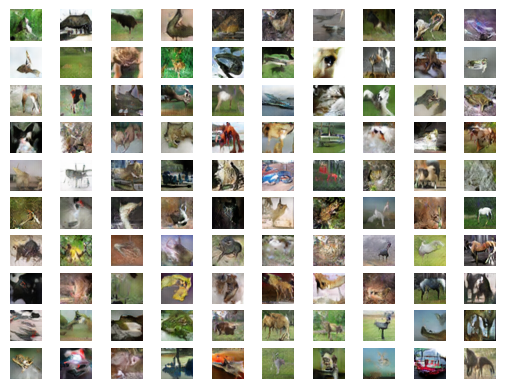

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# plot the generated images
def create_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

# load model
model = load_model('/content/generator_model_300.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 10)

1/1 [==============================] - 0s 177ms/step


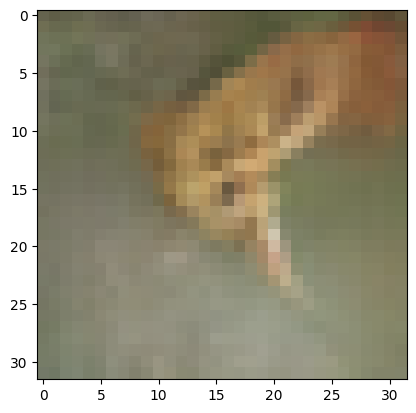

In [ ]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# load model
model = load_model('/content/generator_model_300.h5')

# all 0s
vector = asarray([[0.75 for _ in range(100)]])

# generate image
X = model.predict(vector)

# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
pyplot.imshow(X[0, :, :])
pyplot.show()